# Supervised Learning Classification

Sử dụng một vài thuật toán đã học cho bộ dữ liệu ở Bài tập 1 để dự đoán nhãn của hoa cho những dòng bị thiếu nhãn dựa trên 4 thuộc tính còn lại, so sánh kết quả accuracy và F1 score

Sử dụng 4 thuật toán:


- KNN 
- Logistic Regression
- SVM
- Random forests

In [130]:
import pandas as pd 
data = pd.read_csv('P4AI_BT1.csv')


In [131]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
scaler = MinMaxScaler() 

# strategy(chiến lược): lựa chọn phương pháp để điền dữ liệu còn thiếu 
# đối với dữ liệu liên tục thì sử dụng phương pháp trung bình cộng
# đối với dữ liệu rời rạc thì sử sụng phương pháp tần số cao nhất

imputer = SimpleImputer(strategy='mean') 

df1 = data.drop('variety', axis=1)
col_name = df1.columns
df1 = imputer.fit_transform(df1)
df1 = pd.DataFrame(df1, columns= col_name)

In [132]:
data = pd.concat([df1,data['variety']], axis=1)
data['variety'].value_counts()

Virginica     46
Setosa        45
Versicolor    44
Name: variety, dtype: int64

In [133]:
# ý tưởng chia tập dữ liệu ra thành 2 bộ dữ liệu
# labeled_df sẽ là bộ dữ liệu được sử dụng để train: 
# bao gồm tất cả các dữ liệu đã được gán nhãn sẵn
# unlabeled_df sẽ là bộ dữ liệu chưa được gắn nhãn
# yêu cầu: gắn nhẵn cho bộ dữ liệu test_data

labeled_df = data.dropna(subset=['variety'])
unlabeled_df = data[data['variety'].isna()]
unlabeled_df = unlabeled_df.drop('variety', axis = 1 )
unlabeled_df

,sepal.length,sepal.width,petal.length,petal.width
9,4.9,3.100000,1.5,0.1
11,4.8,3.054815,1.6,0.2
17,5.1,3.500000,1.4,0.3
27,5.2,3.500000,1.5,0.2
33,5.5,4.200000,1.4,0.2
50,7.0,3.200000,4.7,1.4
68,6.2,2.200000,4.5,1.5
70,5.9,3.200000,4.8,1.8
71,6.1,2.800000,4.0,1.3
81,5.5,2.400000,3.7,1.0


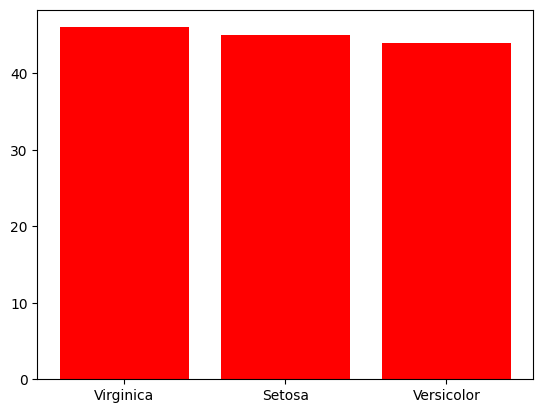

In [134]:
import matplotlib.pyplot as plt 
x = labeled_df['variety'].value_counts().index.to_numpy() 
y = labeled_df['variety'].value_counts().to_numpy()

plt.bar(x,y,color = 'red')
plt.show()

In [135]:
from sklearn.preprocessing import LabelEncoder 

encoder = LabelEncoder() 

labeled_df['variety'] = encoder.fit_transform(labeled_df['variety'])
labeled_df['variety'].value_counts()


C:\Users\Admin\AppData\Local\Temp\ipykernel_14844\2262746246.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled_df['variety'] = encoder.fit_transform(labeled_df['variety'])


2    46
0    45
1    44
Name: variety, dtype: int64

In [136]:
# tập dữ liệu labeled_df sẽ được sử dụng để train mô hình
# trong đó lại chia nhỏ tập train_data làm 2 tập train_data và test_data 
# để đo độ chính xác của mô hình


from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(
    labeled_df.iloc[:, :-1], labeled_df.iloc[:, -1], test_size=0.2, random_state=42
)

In [137]:
X_train


,sepal.length,sepal.width,petal.length,petal.width
13,4.300000,3.000000,1.100000,0.1
137,6.400000,3.100000,5.500000,1.8
90,5.852593,2.600000,4.400000,1.2
116,6.500000,3.000000,5.500000,1.8
94,5.600000,2.700000,4.200000,1.3
...,...,...,...,...
80,5.500000,2.400000,3.800000,1.1
119,6.000000,2.200000,5.000000,1.5
16,5.400000,3.900000,1.300000,0.4
103,6.300000,3.054815,5.600000,1.8


In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [139]:
import pickle

# Huấn luyện mô hình
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

# Dự đoán
predictions = regressor.predict(X_test)

# Đánh giá
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average="macro")

# In kết quả đánh giá
print("LR classification accuracy:", accuracy)
print("LR f1 score:", f1)

# Lưu mô hình thành tệp tin .pkl
with open('model.pkl', 'wb') as file:
    pickle.dump(regressor, file)


LR classification accuracy: 0.8888888888888888
LR f1 score: 0.8642533936651584


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [140]:
unlabeled_df.to_csv('unlabeled_data')

In [141]:
import pickle

Pkl_Filename = "model.pkl"  

with open(Pkl_Filename, 'rb') as file:  
    model = pickle.load(file)

In [142]:
nameToInc = {
    "Setosa": 0,
    "Versicolor": 1,
    "Virginica": 2
}

incToName = {
    "0": "Setosa",
    "1": "Versicolor",
    "2": "Virginica"
}

In [146]:
x_test = pd.read_csv('unlabeled_data').drop("Unnamed: 0", axis=1)
y = model.predict(x_test) 

In [153]:
y

species_names = [incToName[str(label)] for label in y]

variety = pd.DataFrame(species_names, columns=['variety'])

predict_data = pd.concat([x_test, variety], axis=1)
predict_data.to_csv('labeled_data')
